In [86]:
#!pip install numpy pandas matplotlib seaborn scikit-learn xgboost openai 

In [87]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import openai
import tkinter as tk
from tkinter import ttk, messagebox
import os

In [88]:
#loading api key

from openai import OpenAI
OPENAI_API_KEY = "OPENAI_API_KEY"
client = OpenAI(api_key=OPENAI_API_KEY)

In [89]:
# Loading data
calories = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [90]:
# Preprocessing data
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)
calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

C:\Users\Admin\AppData\Local\Temp\ipykernel_15528\2818022692.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)


In [91]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [92]:
# Splitting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [93]:
# Training the model
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
# Helper functions
def calculate_bmi(height, weight):
    height_m = height / 100  # Converting height to meters
    bmi = weight / (height_m ** 2)
    return bmi

In [95]:
#bmi category

def get_bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [96]:
def generate_summary(gender, age, height, weight, duration, heart_rate, body_temp, calories_burnt, bmi, bmi_category):
    prompt = f"Based on the following details: Gender: {gender}, Age: {age}, Height: {height} cm, Weight: {weight} kg, Exercise Duration: {duration} minutes, Heart Rate: {heart_rate} bpm, Body Temperature: {body_temp} °C, Calories Burnt: {calories_burnt}, BMI: {bmi} ({bmi_category}), please provide a concise summary."
    messages = [{"role": "user", "content": prompt}]

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=150,
        n=1,
        stop=None,
        temperature=0.7,
    )

    return response.choices[0].message.content.strip()

In [97]:
def recommend_diet(diet_type, bmi_category):
    prompt = f"Recommend a {diet_type} diet plan for someone in the '{bmi_category}' BMI category."
    messages = [{"role": "user", "content": prompt}]

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=200,
        n=1,
        stop=None,
        temperature=0.7,
    )

    return response.choices[0].message.content.strip()

In [98]:
# GUI

#root window
root = tk.Tk()
root.title("Calories Burnt and Diet Recommendation")
root.geometry("1200x800") 
root.configure(bg="#F0F0F0") 

# Styling
style = ttk.Style()
style.theme_use("clam") 
style.configure("TLabel", font=("Arial", 12), background="#F0F0F0")  
style.configure("TEntry", font=("Arial", 12)) 
style.configure("TButton", font=("Arial", 12)) 
style.configure("TRadiobutton", font=("Arial", 12), background="#F0F0F0") 

In [99]:
# Input fields
input_frame = ttk.Frame(root, padding=10)
input_frame.grid(row=0, column=0, sticky="nsew")

gender_label = ttk.Label(input_frame, text="Gender:")
gender_label.grid(row=0, column=0, sticky="w")
gender_var = tk.StringVar()
gender_male = ttk.Radiobutton(input_frame, text="Male", variable=gender_var, value="male")
gender_male.grid(row=0, column=1, sticky="w")
gender_female = ttk.Radiobutton(input_frame, text="Female", variable=gender_var, value="female")
gender_female.grid(row=0, column=2, sticky="w")

age_label = ttk.Label(input_frame, text="Age:")
age_label.grid(row=1, column=0, sticky="w")
age_entry = ttk.Entry(input_frame)
age_entry.grid(row=1, column=1, columnspan=2, sticky="ew")

height_label = ttk.Label(input_frame, text="Height (cm):")
height_label.grid(row=2, column=0, sticky="w")
height_entry = ttk.Entry(input_frame)
height_entry.grid(row=2, column=1, columnspan=2, sticky="ew")

weight_label = ttk.Label(input_frame, text="Weight (kg):")
weight_label.grid(row=3, column=0, sticky="w")
weight_entry = ttk.Entry(input_frame)
weight_entry.grid(row=3, column=1, columnspan=2, sticky="ew")

duration_label = ttk.Label(input_frame, text="Exercise Duration (minutes):")
duration_label.grid(row=4, column=0, sticky="w")
duration_entry = ttk.Entry(input_frame)
duration_entry.grid(row=4, column=1, columnspan=2, sticky="ew")

heart_rate_label = ttk.Label(input_frame, text="Heart Rate (bpm):")
heart_rate_label.grid(row=5, column=0, sticky="w")
heart_rate_entry = ttk.Entry(input_frame)
heart_rate_entry.grid(row=5, column=1, columnspan=2, sticky="ew")

body_temp_label = ttk.Label(input_frame, text="Body Temperature (°C):")
body_temp_label.grid(row=6, column=0, sticky="w")
body_temp_entry = ttk.Entry(input_frame)
body_temp_entry.grid(row=6, column=1, columnspan=2, sticky="ew")

diet_type_label = ttk.Label(input_frame, text="Diet Type:")
diet_type_label.grid(row=7, column=0, sticky="w")
diet_type_var = tk.StringVar()
diet_type_non_veg = ttk.Radiobutton(input_frame, text="Non-Vegetarian", variable=diet_type_var, value="non-vegetarian")
diet_type_non_veg.grid(row=7, column=1, sticky="w")
diet_type_veg = ttk.Radiobutton(input_frame, text="Vegetarian", variable=diet_type_var, value="vegetarian")
diet_type_veg.grid(row=7, column=2, sticky="w")

In [100]:
# BMI and Category Frame
bmi_frame = ttk.Frame(root, padding=10)
bmi_frame.grid(row=1, column=0, sticky="nsew")

bmi_value_label = ttk.Label(bmi_frame, text="BMI :")
bmi_value_label.grid(row=1, column=0, sticky="w")

category_label = ttk.Label(bmi_frame, text="Category :")
category_label.grid(row=2, column=0, sticky="w")

# Output fields
output_frame = ttk.Frame(root, padding=10)
output_frame.grid(row=2, column=0, sticky="nsew")

# Predicted Calories Label
#predicted_calories_label = ttk.Label(output_frame, text="Predicted Calories Burnt :")
#predicted_calories_label.grid(row=0, column=0, sticky="w")
#predicted_calories_value_label = ttk.Label(output_frame, text="")
#predicted_calories_value_label.grid(row=0, column=0, sticky="w")

summary_label = ttk.Label(output_frame, text="SUMMARY :")
summary_label.grid(row=2, column=0, sticky="w")

summary_text = tk.Text(output_frame, height=5, width=145)
summary_text.grid(row=3, column=0, sticky="nsew")

diet_label = ttk.Label(output_frame, text="RECOMMENDED DIET :")
diet_label.grid(row=4, column=0, sticky="w")

diet_text = tk.Text(output_frame, height=10, width=145)
diet_text.grid(row=5, column=0, sticky="nsew")

In [101]:
# Calculate function
def calculate():
    gender = gender_var.get()
    age = int(age_entry.get())
    height = float(height_entry.get())
    weight = float(weight_entry.get())
    duration = float(duration_entry.get())
    heart_rate = float(heart_rate_entry.get())
    body_temp = float(body_temp_entry.get())
    diet_type = diet_type_var.get()

    # 1. Comparing User Input
    if age < 18:
        messagebox.showinfo("Information", "The recommended diet feature is intended for adults 18 years and older.")
        return

    user_input = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'Duration': [duration],
        'Heart_Rate': [heart_rate],
        'Body_Temp': [body_temp]
    })

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    user_input['Gender'] = le.fit_transform(user_input['Gender'])

    predicted_calories = model.predict(user_input)
    #predicted_calories_value_label.config(text=f"{predicted_calories[0]:.2f} kcal")

    # 2. Comparing Predicted Values
    if predicted_calories[0] > 2500:
        summary_text.insert(tk.END, f"Based on your input, you seem to be burning a significant amount of calories ({predicted_calories[0]:.2f}). Consult a healthcare professional for personalized guidance.\n\n")

    bmi = calculate_bmi(height, weight)
    bmi_category = get_bmi_category(bmi)


    bmi_value_label.config(text=f"BMI :{bmi:.2f}")
    category_label.config(text=f"Category :{bmi_category}")

    # 3. Comparing with Predefined Values
    if bmi_category == "Underweight":
        summary_text.insert(tk.END, f"Your BMI indicates you're underweight. Consider consulting a healthcare professional for personalized advice on nutrition.\n\n")
    elif bmi_category == "Overweight":
        summary_text.insert(tk.END, f"Your BMI indicates you're overweight. Consider consulting a healthcare professional for personalized advice on nutrition.\n\n")
    elif bmi_category == "Obese":
        summary_text.insert(tk.END, f"Your BMI indicates you're obese. Consider consulting a healthcare professional for personalized advice on nutrition.\n\n")

    summary_text.insert(tk.END, generate_summary(gender, age, height, weight, duration, heart_rate, body_temp, predicted_calories[0], bmi, bmi_category))

    diet_text.delete('1.0', tk.END)
    diet_text.insert(tk.END, recommend_diet(diet_type, bmi_category))

In [102]:
# Calculate button
calculate_button = ttk.Button(input_frame, text="Calculate", command=calculate)
calculate_button.grid(row=8, column=0, columnspan=3, sticky="ew", pady=10)

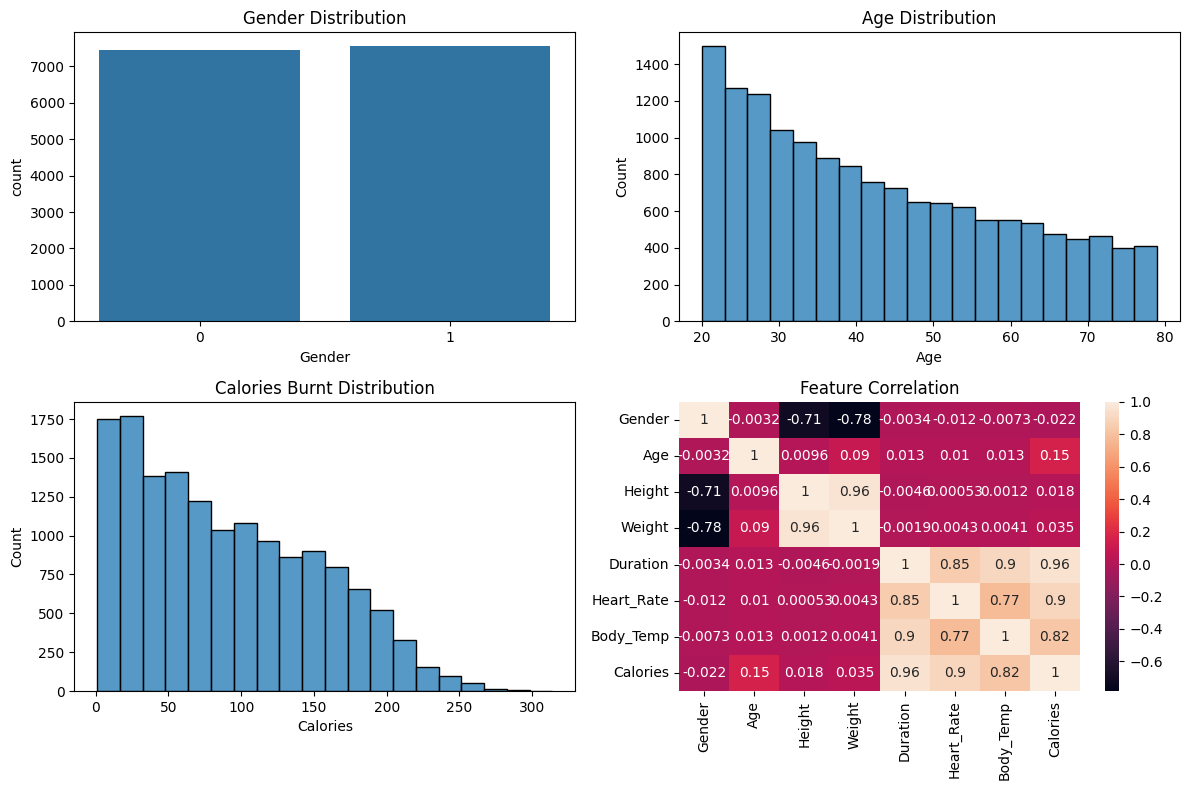

In [103]:
# Data Visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gender Distribution
sns.countplot(data=calories_data, x='Gender', ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')

# Age Distribution
sns.histplot(data=calories_data, x='Age', bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution')

# Calories Burnt Distribution
sns.histplot(data=calories_data, x='Calories', bins=20, ax=axs[1, 0])
axs[1, 0].set_title('Calories Burnt Distribution')

# Correlation Heatmap
corr = calories_data.drop(columns=['User_ID']).corr()
sns.heatmap(corr, annot=True, ax=axs[1, 1])
axs[1, 1].set_title('Feature Correlation')

plt.tight_layout()
plt.show()

1. Comparing Model Performance

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
# Load models 
model1 = model  # Your original XGBRegressor model
model2 = XGBRegressor()  # Train a new XGBRegressor model with different parameters

In [106]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [107]:
# Making predictions on the test set
y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.fit(X_train, y_train).predict(X_test)

In [108]:
# Calculating performance metrics
mse_model1 = mean_squared_error(y_test, y_pred_model1)
mse_model2 = mean_squared_error(y_test, y_pred_model2)

In [109]:
# Displaying the results
print(f"Model 1 MSE: {mse_model1:.4f}")
print(f"Model 2 MSE: {mse_model2:.4f}")

Model 1 MSE: 2.2990
Model 2 MSE: 4.4344


2. Baseline Comparison

In [110]:
# Calculating baseline performance (e.g., average calorie expenditure)
baseline_prediction = Y_train.mean()

# Calculating error metric for baseline
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))

# Displaying baseline performance alongside model's performance
print(f"Baseline MSE: {baseline_mse:.4f}")

Baseline MSE: 3861.7177


3. Feature Importance Comparison

In [111]:
# Checking if model provides feature importances
if hasattr(model1, 'feature_importances_'):
    feature_importances = model1.feature_importances_

    # Displaying feature importances sorted by importance
    sorted_idx = feature_importances.argsort()[::-1]
    for i, idx in enumerate(sorted_idx):
        print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

Duration: 0.8991
Heart_Rate: 0.0460
Gender: 0.0268
Age: 0.0222
Weight: 0.0055
Height: 0.0002
Body_Temp: 0.0002


4. Comparing Predicted vs. Actual Values (Visualization)

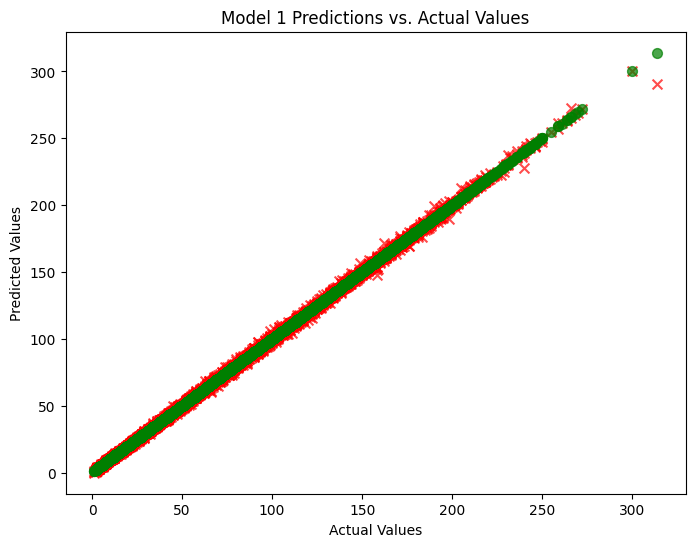

In [112]:
plt.figure(figsize=(8, 6))

# Creating a scatter plot with different colors for actual and predicted values
plt.scatter(y_test, y_pred_model1, s=50, alpha=0.7, c='r', label='Predicted', marker='x')  # Predicted values in red with 'x' marker
plt.scatter(y_test, y_test, s=50, alpha=0.7, c='g', label='Actual', marker='o')  # Actual values in green with 'o' marker

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model 1 Predictions vs. Actual Values")
plt.show()

In [113]:
root.mainloop()